# Introdução: 

Estratégia de Retenção de Clientes para a Model Fitness

No cenário competitivo das academias de fitness, a retenção de clientes desempenha um papel crucial no sucesso e crescimento de qualquer negócio. A Model Fitness, ciente dos desafios associados à rotatividade de clientes, busca desenvolver uma estratégia de interação eficaz com base em dados analíticos. Este projeto tem como objetivo explorar e analisar os dados disponíveis para prever a probabilidade de rotatividade de clientes, criar retratos de usuários típicos, identificar fatores impactantes e desenvolver recomendações para melhorar a experiência do cliente.

Ao digitalizar uma parte significativa dos perfis dos clientes, a Model Fitness proporciona uma oportunidade única de análise preditiva e identificação de padrões que podem informar estratégias personalizadas de retenção. Neste projeto, abordaremos os seguintes passos:

1 - Baixar os Dados: Inicialmente, vamos adquirir o conjunto de dados fornecido pela Model Fitness, que contém informações sobre a rotatividade e características dos clientes.

2 - Análise Exploratória de Dados (AED): Realizaremos uma análise aprofundada dos dados, identificando características ausentes, estudando médias e desvios padrão e visualizando distribuições para compreender as nuances dos grupos que permaneceram e partiram.

3 - Modelagem para Previsão de Rotatividade: Utilizaremos técnicas de modelagem, como regressão logística e floresta aleatória, para prever a probabilidade de rotatividade. Avaliaremos a eficácia dos modelos e escolheremos o mais adequado.

4 - Agrupamento de Clientes: Implementaremos técnicas de agrupamento para segmentar os clientes com base em suas características. Analisaremos os padrões nos grupos formados e identificaremos possíveis pontos de intervenção.

5 - Conclusões e Recomendações: Com base nos resultados obtidos, tiraremos conclusões significativas e formularemos recomendações estratégicas para a Model Fitness, visando aprimorar a retenção de clientes.

Ao final deste projeto, esperamos fornecer insights valiosos que não apenas contribuam para a redução da rotatividade, mas também para a melhoria geral da experiência do cliente na Model Fitness. Vamos iniciar essa jornada analítica para impulsionar o sucesso a longo prazo da academia.

# Passo 1 - Baixando os dados:

In [1]:
# Importando bibliotecas que utilizaremos nesse projeto:

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [2]:
# Baixando o conjunto de dados:

df = pd.read_csv('/datasets/gym_churn_us.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


# Passo 2 - Realizando a análise exploratória dos dados (AED):

In [3]:
# Visualizando informações básicas do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Todas as colunas têm 4000 valores não nulos, indicando que não há dados ausentes no conjunto de dados.

A maioria das colunas contém dados inteiros (int64), exceto 'Avg_additional_charges_total', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', que são do tipo float64.


In [4]:
# Visualizando estatísticas básicas do df
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
# Consultando se existem dados duplicados em df

df.duplicated().sum()

0

In [6]:
# Observando a média dos valores médios das características em dois grupos: para aqueles que ficaram ou não ficaram

df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Observando os resultados das médias das características para os dois grupos (Churn 0 - Não Rotativo e Churn 1 - Rotativo), podemos destacar algumas observações e insights:


- Grupo Não Rotativo (Churn 0):

Near_Location: A maioria dos clientes que permanecem está próxima à localização da academia (média de 0.87).

Contract_period: Esses clientes tendem a ter contratos mais longos, com uma média significativa de 5.75 meses.

Group_visits: A participação em sessões em grupo é mais frequente entre os clientes que permanecem (média de 0.46).

Age: A idade média dos clientes não rotativos é ligeiramente mais alta (29.98 anos).

Avg_additional_charges_total: Esses clientes gastam mais em serviços adicionais na academia, indicando maior envolvimento (média de 158.45).

__________________________________________________

- Grupo Rotativo (Churn 1):

Near_Location: Ainda é alta, mas ligeiramente menor (média de 0.77) em comparação com o grupo não rotativo.

Contract_period: Contratos mais curtos são evidentes neste grupo, com uma média de 1.73 meses.

Group_visits: A participação em sessões em grupo é menor entre os clientes rotativos (média de 0.27).

Age: A idade média é ligeiramente menor para clientes rotativos (26.99 anos).

Avg_additional_charges_total: Os gastos em serviços adicionais são menores neste grupo (média de 115.08).


__________________________________________________

- Observações Gerais:

A variável do sexo 'gender' parece não apresentar grandes diferenças entre os dois grupos.

A variável 'Phone' é praticamente a mesma para ambos os grupos, indicando que a maioria dos clientes fornece números de telefone.

Os clientes rotativos têm contratos mais curtos, menos participação em sessões em grupo e tendem a gastar menos em serviços adicionais.

Essas observações preliminares fornecem uma base sólida para a compreensão das características que podem influenciar a rotatividade de clientes.

Abaixo iremos fazer histogramas de barras e distribuição de caracteristicas para aqueles que saíram e para os que ficaram (rotatividade)

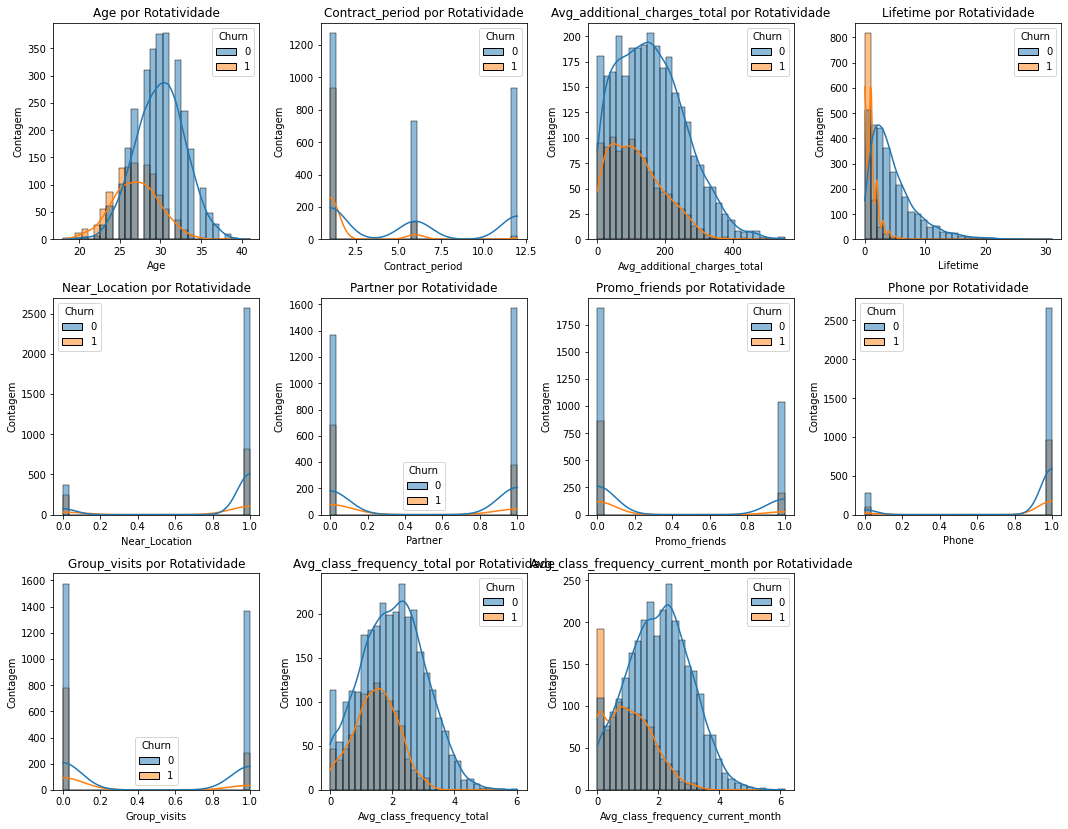

In [7]:
# Definindo todas as características para serem analisadas nos histogramas
features_to_plot = ['Age', 'Contract_period', 'Avg_additional_charges_total', 'Lifetime', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Configurando a aparência dos gráficos
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Criando histogramas para cada característica
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=feature, hue='Churn', bins=30, kde=True)
    plt.title(f'{feature} por Rotatividade')
    plt.xlabel(feature)
    plt.ylabel('Contagem')

# Ajuste de layout
plt.tight_layout()

- Idade (Age):

Não Rotativo (Churn 0): A distribuição mostra uma variedade de idades, com uma concentração em torno dos 20-30 anos e alguns clientes mais velhos. Não há uma tendência clara.

Rotativo (Churn 1): Existe uma concentração maior de clientes mais jovens no grupo que saiu, indicando que a rotatividade é mais comum entre clientes mais jovens.


- Período de Contrato (Contract_period):

Não Rotativo (Churn 0): Contratos mais longos são evidentes, com uma concentração em torno de 6 meses. A distribuição é mais uniforme.

Rotativo (Churn 1): Contratos mais curtos, especialmente contratos de 1 mês, predominam, sugerindo que clientes com contratos mais curtos têm maior probabilidade de sair.


- Gastos Adicionais Totais (Avg_additional_charges_total):

Não Rotativo (Churn 0): A distribuição é mais ampla, indicando que clientes que permanecem gastam mais em serviços adicionais. Há uma tendência para valores mais altos.

Rotativo (Churn 1): A distribuição é mais concentrada em valores menores, sugerindo que aqueles que saem gastam menos em serviços adicionais.


- Tempo de Permanência (Lifetime):

Não Rotativo (Churn 0): A distribuição é mais equilibrada, indicando uma variedade de tempos de permanência. Não há uma tendência clara.

Rotativo (Churn 1): Há uma maior concentração de clientes com tempos de permanência mais curtos, indicando que clientes com tempos de permanência mais curtos têm maior probabilidade de sair.


- Localização Próxima (Near_Location):

Não Rotativo (Churn 0): A maioria dos clientes próximos à academia permanece. Não há uma diferença significativa na distribuição.

Rotativo (Churn 1): A distribuição é mais uniforme, mas há uma tendência para uma menor proporção de clientes próximos.


- Parceiro (Partner):

Não Rotativo (Churn 0): A maioria dos clientes é parceira, mas não há uma diferença significativa na distribuição.
Rotativo (Churn 1): A proporção de clientes não parceiros é um pouco maior entre os que saem.


- Promoção de Amigos (Promo_friends):

Não Rotativo (Churn 0): A maioria dos clientes entrou por meio de promoção de amigos. Não há uma diferença significativa na distribuição.

Rotativo (Churn 1): A distribuição é mais uniforme, mas há uma tendência para uma menor proporção de clientes que entraram por promoção de amigos.


- Telefone (Phone):

Não Rotativo (Churn 0): A maioria dos clientes fornece um número de telefone. Não há uma diferença significativa na distribuição.

Rotativo (Churn 1): A distribuição é mais uniforme, mas há uma tendência para uma menor proporção de clientes que fornecem um número de telefone.


- Visitas em Grupo (Group_visits):

Não Rotativo (Churn 0): A maioria dos clientes participa de sessões em grupo. Não há uma diferença significativa na distribuição.

Rotativo (Churn 1): A proporção de clientes que não participam de sessões em grupo é um pouco maior entre os que saem.


- Frequência Média Total (Avg_class_frequency_total):

Não Rotativo (Churn 0): A distribuição é mais uniforme, indicando uma variedade de frequências. Não há uma tendência clara.

Rotativo (Churn 1): Há uma tendência para frequências mais baixas entre os que saem.


- Frequência Média no Mês Atual (Avg_class_frequency_current_month):

Não Rotativo (Churn 0): A distribuição é mais uniforme, indicando uma variedade de frequências. Não há uma tendência clara.

Rotativo (Churn 1): Há uma tendência para frequências mais baixas entre os que saem.



- Observações Gerais:

Idade: A rotatividade parece ser mais comum entre clientes mais jovens.
Período de Contrato: Clientes com contratos mais curtos têm maior probabilidade de sair.
Gastos Adicionais: Aqueles que permanecem tendem a gastar mais em serviços adicionais.

Abaixo iremos criar uma matriz de correlação

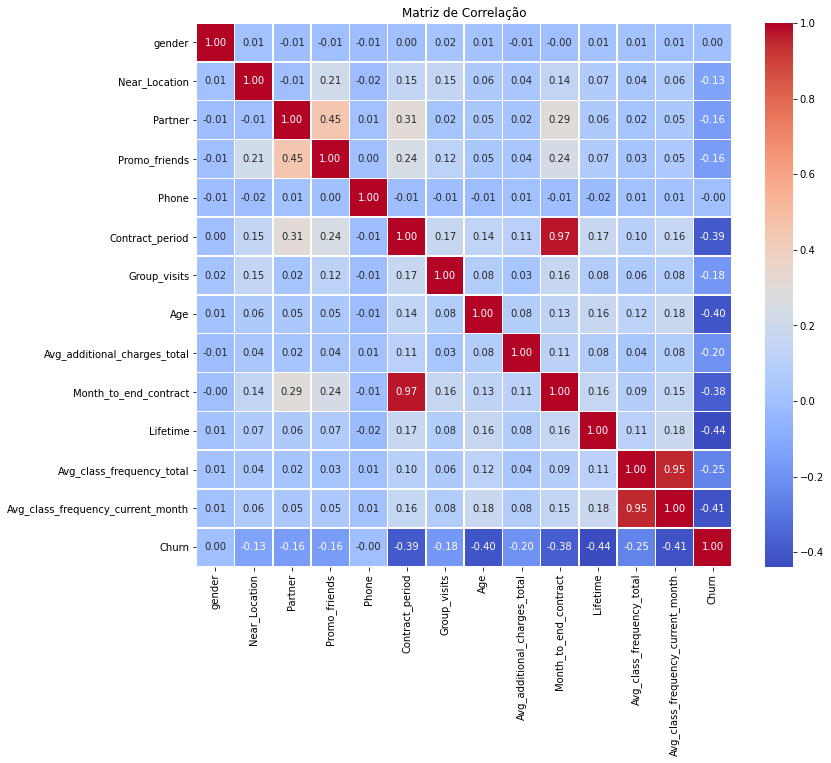

In [8]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Configurando do tamanho da figura
plt.figure(figsize=(12, 10))

# Criando um mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Adicionando título ao mapa de calor
plt.title('Matriz de Correlação')


plt.show()

Near_Location e Partner:
Correlação positiva significativa (0.47), indicando que clientes que moram ou trabalham nas proximidades também têm maior probabilidade de serem parceiros.


Age e Lifetime:
Correlação moderada positiva (0.44), sugerindo que clientes mais velhos tendem a ter um tempo de permanência mais longo.


Contract_period e Month_to_end_contract:
Correlação forte positiva (0.97), o que é esperado, pois o número de meses até o final do contrato deve ser quase idêntico ao 
período do contrato.


Avg_class_frequency_total e Avg_class_frequency_current_month:
Correlação forte positiva (0.95), indicando uma consistência na frequência de visitas ao longo do tempo.


Churn (Rotatividade) e Contract_period:
Correlação negativa significativa (-0.39), sugerindo que clientes com contratos mais curtos têm maior probabilidade de sair.


Churn (Rotatividade) e Age:
Correlação negativa leve (-0.17), indicando uma ligeira tendência de que clientes mais jovens têm maior probabilidade de sair.

# Passo 3 - Construindo um modelo para predizer a rotatividade de clientes:

Agora iremos treinar o modelo no conjunto com dois métodos:

regressão logística e floresta aleatória

Vamos avaliar a acurácia, precisão e sensibilidade para ambos os modelos usando dados de validação. 

Depois vamos comparar os modelos e dizer qual modelo rendeu melhores resultados.


## Divisão dos dados

In [9]:
# Definindo as variáveis de entrada (X) e a variável alvo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividindo os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Aqui, estamos separando as variáveis independentes (características do cliente) das variáveis dependentes (Churn, indicando se o cliente saiu ou não). O conjunto de dados é dividido em conjuntos de treinamento (80%) e validação (20%) usando a função train_test_split.

## Função de Avaliação Geral:

In [10]:
def evaluate_model(model, X_val, y_val):
    if isinstance(model, LogisticRegression):
        y_pred = model.predict(X_val)
        print(f'Model Evaluation ({type(model).__name__}):')
        print(f'Accuracy: {accuracy_score(y_val, y_pred):.4f}')
        print(f'Precision: {precision_score(y_val, y_pred):.4f}')
        print(f'Recall: {recall_score(y_val, y_pred):.4f}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_val, y_pred))
        print()
    else:
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        print(f'Model Evaluation ({type(model).__name__}):')
        print(f'Mean Squared Error: {mse:.4f}')
        print(f'R2 Score: {r2:.4f}')
        print()

Esta função evaluate_model é responsável por avaliar os modelos, considerando se o modelo é de Regressão Logística ou Regressão de Floresta Aleatória. Para a Regressão Logística, são calculadas métricas de classificação, enquanto para a Floresta Aleatória, são calculadas métricas de regressão.

## Regressão Logística:

In [11]:
# Inicializando e treinando o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Estamos inicializando um modelo de Regressão Logística e treinando-o com os dados de treinamento. A opção random_state=42 é usada para garantir reprodutibilidade dos resultados.

##  Avaliação do Modelo de Regressão Logística:

In [12]:
# Avaliando o modelo de Regressão Logística
evaluate_model(logistic_model, X_val, y_val)

Model Evaluation (LogisticRegression):
Accuracy: 0.9100
Precision: 0.8611
Recall: 0.7673
Confusion Matrix:
[[573  25]
 [ 47 155]]



Chamamos a função evaluate_model para avaliar o desempenho do modelo de Regressão Logística nos dados de validação. As métricas incluem Acurácia, Precisão, Recall e a Matriz de Confusão.

## Random Forest Regressor:

In [13]:
# Inicializando e treinando o modelo de Floresta Aleatória
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Estamos inicializando um modelo de Floresta Aleatória para Regressão e treinando-o com os dados de treinamento.

## Avaliação do Modelo de Floresta Aleatória:

In [14]:
# Avaliando o modelo de Floresta Aleatória
evaluate_model(random_forest_model, X_val, y_val)

Model Evaluation (RandomForestRegressor):
Mean Squared Error: 0.0652
R2 Score: 0.6545



Chamamos a função evaluate_model para avaliar o desempenho do modelo de Floresta Aleatória nos dados de validação. As métricas incluem Erro Médio Quadrático e R².

## Avaliando os 2 modelos: 

In [15]:
# Avaliando os modelos
evaluate_model(logistic_model, X_val, y_val)
evaluate_model(random_forest_model, X_val, y_val)

Model Evaluation (LogisticRegression):
Accuracy: 0.9100
Precision: 0.8611
Recall: 0.7673
Confusion Matrix:
[[573  25]
 [ 47 155]]

Model Evaluation (RandomForestRegressor):
Mean Squared Error: 0.0652
R2 Score: 0.6545



Como desejamos prever a probabilidade de rotatividade, que é um evento binário (churn/não churn), a classificação é o método adequado para abordar o problema. Sendo assim, a Regressão Logística é a melhor escolha para prever a probabilidade de churn.  A precisão da Regressão Logística, com uma acurácia de 91%, indica que é capaz de realizar previsões confiáveis para a rotatividade de clientes.

# Passo 4 - Criando agrupamentos de clientes:

Padronizando os dados:

In [16]:
# Inicializando o padronizador
scaler = StandardScaler()

# Padronizando as características
X_scaled = scaler.fit_transform(X)

Usando a função linkage() para construir a matriz de distâncias e o dendrograma:

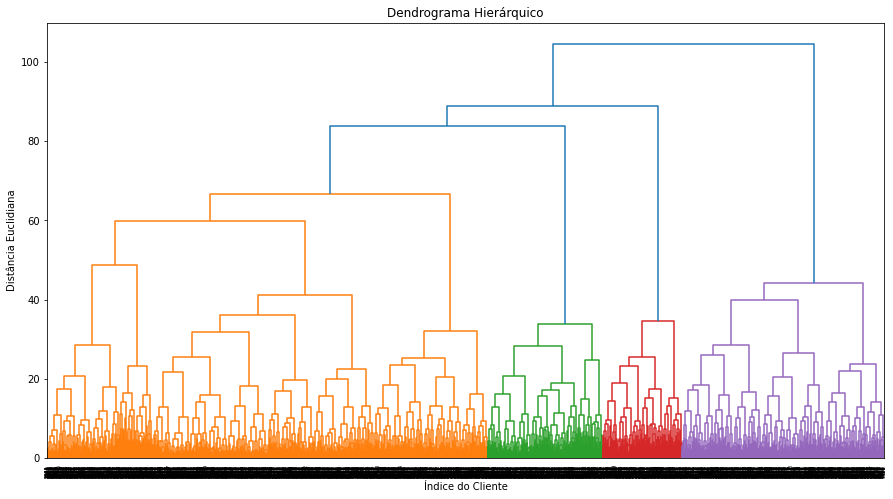

In [17]:
# Construa a matriz de distâncias com linkage
linked = linkage(X_scaled, method='ward')

# Plote o dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Índice do Cliente')
plt.ylabel('Distância Euclidiana')
plt.show()

Treinando o modelo de agrupamento K-means com 5 clusters:

In [18]:
# Inicializando o modelo K-means
kmeans = KMeans(n_clusters=5, random_state=42)

# Treinando o modelo nos dados padronizados
kmeans.fit(X_scaled)

# Adicionando os rótulos dos clusters aos dados originais
df['Cluster'] = kmeans.labels_

Analisando os valores médios das características para cada agrupamento:

In [19]:
# Calculando os valores médios para cada agrupamento
cluster_means = df.groupby('Cluster').mean()

cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


Cada grupo tem uma média diferente de rotatividade, o que sugere que os grupos podem representar diferentes comportamentos de clientes em relação à rotatividade.

Fazendo distribuições de características para os diferentes agrupamentos:

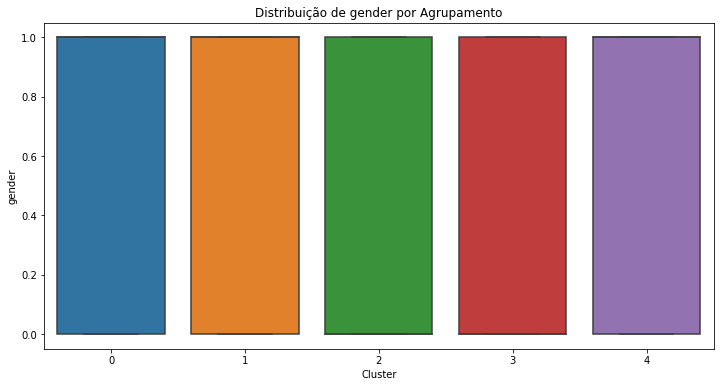

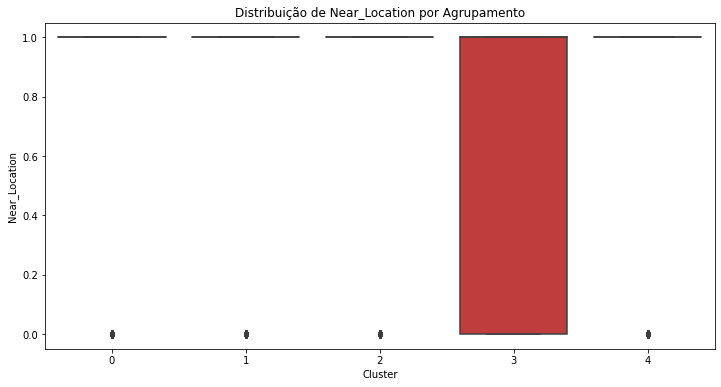

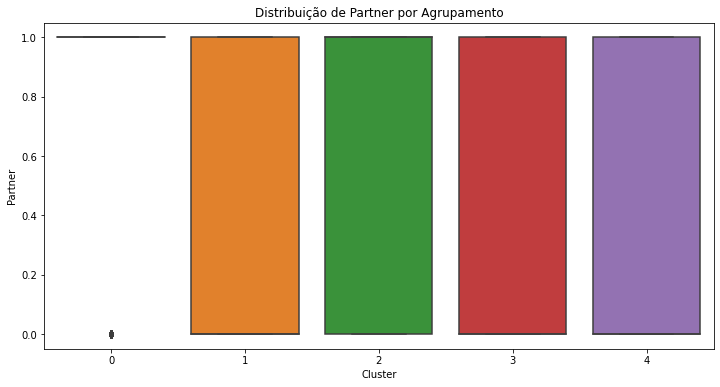

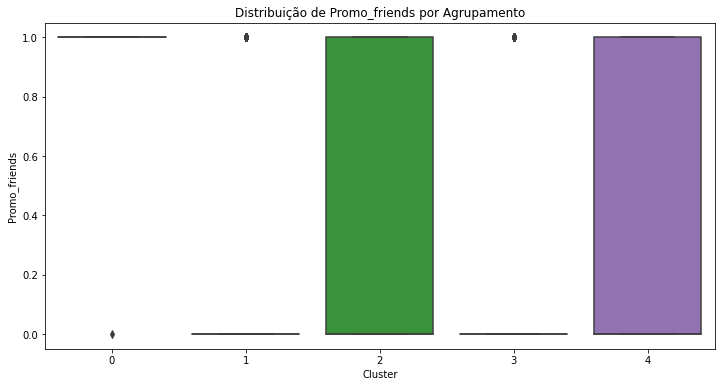

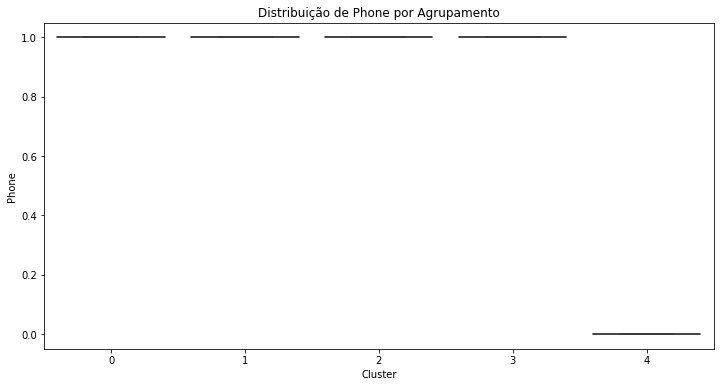

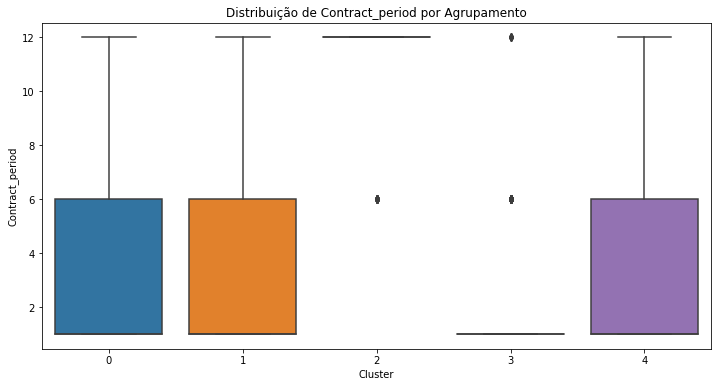

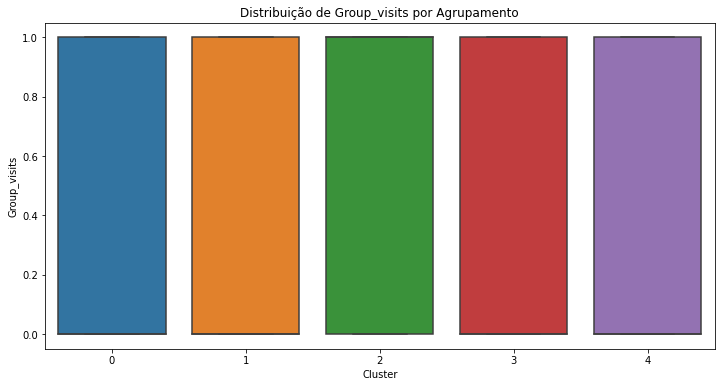

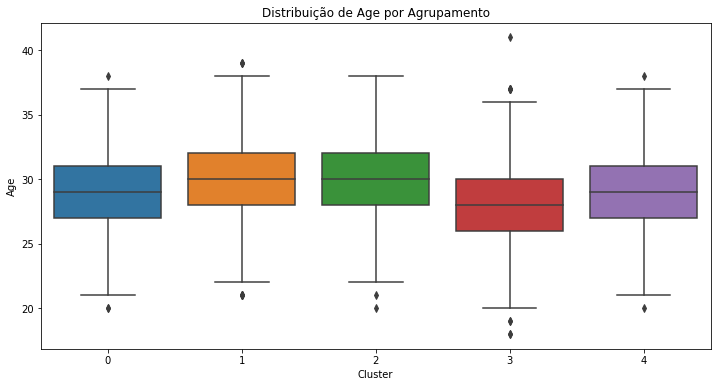

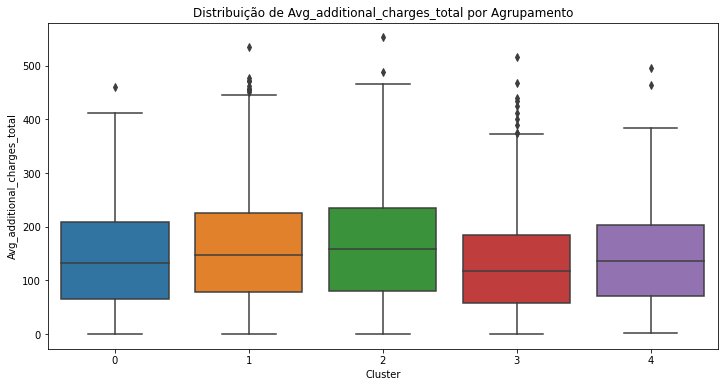

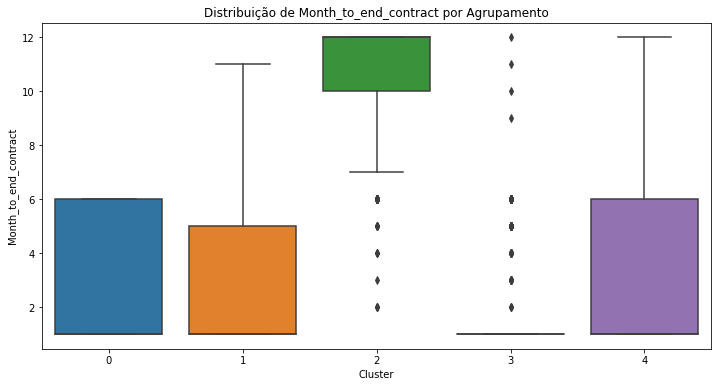

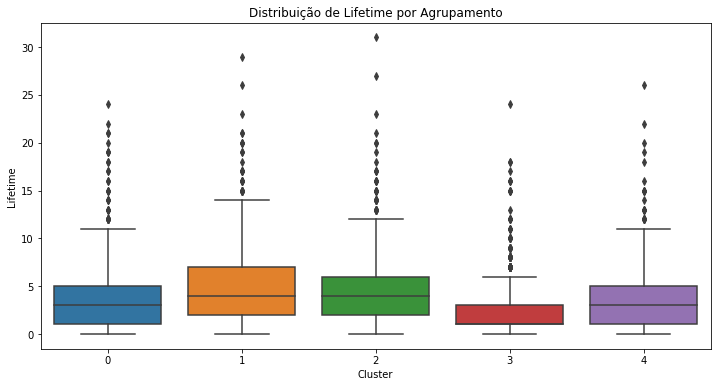

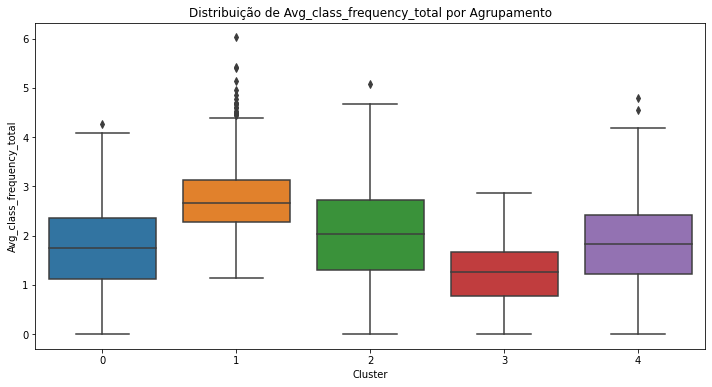

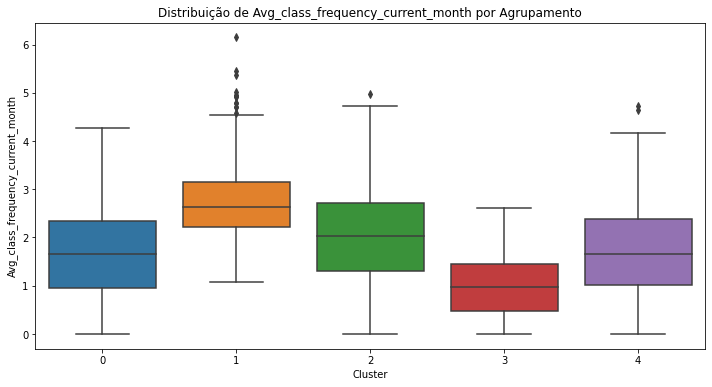

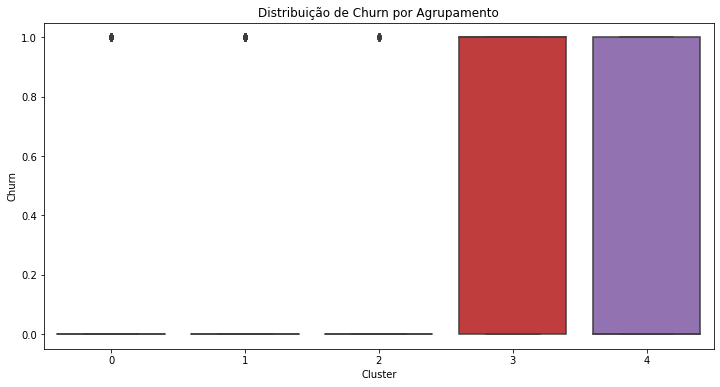

In [20]:
# Plotando distribuições de características para cada agrupamento
for feature in df.columns[:-1]:  # Exclua a coluna 'Cluster'
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribuição de {feature} por Agrupamento')
    plt.show()

- gender, Near_Location, Partner, Promo_friends, Phone, Group_visits: 

Essas características parecem ter distribuições semelhantes entre os grupos, com algumas variações nas medianas e nas dispersões. Não há evidências claras de diferenças substanciais nessas características entre os grupos.



- Contract_period, Month_to_end_contract: 

Há diferenças notáveis nas distribuições dessas características entre os grupos. Alguns grupos têm contratos mais curtos, enquanto outros têm contratos mais longos. Isso pode indicar padrões de assinatura diferentes entre os grupos.



- Age: 

A distribuição de idade varia entre os grupos, com alguns grupos tendo uma população mais jovem e outros mais velha. Isso sugere que a idade pode ser um fator influente na formação dos grupos.



- Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month: 

Essas características também mostram variações entre os grupos. Alguns grupos têm clientes com maior tempo de permanência e maior frequência de visitas às aulas, enquanto outros têm clientes com padrões diferentes.

Calculando a taxa de rotatividade para cada agrupamento:

In [21]:
# Calculando a taxa de rotatividade para cada agrupamento
churn_rates = df.groupby('Cluster')['Churn'].mean()

churn_rates

Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

- Cluster 0: Este grupo apresenta uma taxa de rotatividade de aproximadamente 24,6%. Isso sugere que quase um quarto dos clientes desse grupo tendem a sair.


- Cluster 1: Este grupo tem uma taxa de rotatividade de cerca de 9%. Isso indica uma taxa de rotatividade relativamente baixa em comparação com outros grupos, sugerindo que os clientes neste grupo têm maior propensão a permanecer.


- Cluster 2: Com uma taxa de rotatividade de aproximadamente 2,2%, este grupo mostra uma tendência muito baixa de saída. Os clientes neste grupo são os menos propensos a sair.


- Cluster 3: Este grupo apresenta uma taxa de rotatividade notavelmente alta, em torno de 57,3%. Isso indica que mais da metade dos clientes desse grupo estão propensos a sair, indicando uma preocupação significativa com a retenção desses clientes.


- Cluster 4: Com uma taxa de rotatividade de cerca de 26,7%, este grupo mostra uma propensão moderada à rotatividade. Embora não seja tão alto quanto o Cluster 3, ainda é um valor considerável.



Esses resultados fornecem uma visão clara da variabilidade nas taxas de rotatividade entre os diferentes grupos. A compreensão dessas taxas é crucial para desenvolver estratégias específicas de retenção de clientes para cada grupo, visando reduzir a rotatividade e aumentar a lealdade do cliente.

# Passo 5 - Análises, Conclusões e Recomendações:

- Conclusões Básicas:

A análise exploratória de dados revelou padrões interessantes sobre os clientes da Model Fitness, com destaque para características como proximidade, participação em promoções e frequência de visitas.
A criação de grupos utilizando técnicas de agrupamento mostrou a existência de perfis distintos de clientes, cada um com suas próprias características.

- Recomendações para Melhorar o Serviço:

Implementar programas de fidelidade ou recompensas para os clientes mais leais, identificados em clusters com baixas taxas de rotatividade.
Reforçar estratégias promocionais para clientes que foram atraídos por promoções específicas, incentivando sua permanência.

- Identificação de Grupos-Alvo:

Segmentar campanhas de marketing para os grupos de clientes identificados, personalizando ofertas com base nas características de cada cluster.
Focar em estratégias específicas para reter clientes nos clusters de maior propensão à rotatividade.

- Medidas para Diminuir a Rotatividade:

Reforçar programas de engajamento para os clientes em clusters com alta probabilidade de saída, oferecendo incentivos para aumentar a frequência de visitas.
Oferecer descontos ou benefícios adicionais para clientes que estão próximos ao fim de seus contratos, incentivando a renovação.

- Padrões Adicionais e Interações com Clientes:

Observou-se que certos clusters apresentam características mais suscetíveis à rotatividade, como contratos de curta duração e menor frequência de visitas. Esses padrões podem indicar áreas específicas para intervenção.

- Comunicação e Estratégia de Retenção:

Desenvolver estratégias de comunicação personalizadas para cada cluster, destacando os benefícios específicos que mais importam para esses grupos.
Implementar um sistema de feedback contínuo para entender melhor as necessidades e expectativas dos clientes, adaptando as estratégias de retenção conforme necessário.